### **Сучасні технології збору та аналізу супутникових даних для геоінформаційних систем**

#### Вступ до технології збору супутникових даних

Сучасні методи дистанційного зондування Землі дозволяють отримувати високоякісні супутникові зображення практично будь-якої точки планети. Представлений ноутбук наочно демонструє основні етапи та процедури збору даних із використанням сервісу Google Maps, а розроблений при цьому модуль SatelliteImageRetriever представляє собою потужний інструмент для автоматизованого збору таких даних через Google Maps Static API. 
Основна перевага цього підходу полягає в можливості отримання актуальних знімків територій у режимі реального часу, що особливо критично при моніторингу швидкозмінних ситуацій, таких як наслідки військових дій, природні катастрофи або динамічні екологічні процеси.
Принцип роботи модуля базується на розбитті великих територій на менші фрагменти (тайли), які можна завантажувати окремо та згодом об'єднувати у цілісне зображення. Такий підхід забезпечує високу роздільну здатність навіть для обширних регіонів, оскільки дозволяє обходити обмеження API на розмір одного зображення. Автоматичне обчислення оптимального масштабу гарантує найкращий баланс між деталізацією та обсягом даних.

#### Основи картографічних проекцій та координатних систем
Для ефективного використання модуля необхідно розуміти основи роботи з географічними координатами та їх перетворенням у піксельні значення на зображенні. Модуль використовує проекцію Web Mercator, яка є стандартом для більшості сучасних веб-картографічних сервісів. Ця проекція дозволяє точно відображати земну поверхню на плоскому зображенні з мінімальними спотвореннями для більшості практичних завдань.
Для вирішення ряду допоміжних задач в процесі створення модуля ми розробимо певні додаткові методи, наприклад, методи lat_lon_to_pixels та pixels_to_lat_lon забезпечують двосторонню конвертацію між географічними координатами (широта та довгота у градусах) та піксельними координатами на зображенні. Це критично важливо для точного позиціонування об'єктів на карті та створення геопросторових метаданих. Розуміння цих перетворень дозволяє контролювати процес збору даних та забезпечувати їх географічну точність.

Функція calculate_zoom_level автоматично визначає оптимальний рівень масштабування на основі розмірів досліджуваного регіону. Рівень масштабу (zoom level) у системі тайлових карт варіюється від 0 (вся планета на одному тайлі) до 20+ (максимальна деталізація). Правильний вибір масштабу забезпечує оптимальний баланс між деталізацією зображення та кількістю необхідних запитів до API.

#### Налаштування та ініціалізація системи

Початок роботи з модулем починається зі створення екземпляра класу SatelliteImageRetriever. Конструктор потребує обов'язкового параметра api_key - ключа доступу до Google Maps Static API, який можна отримати через Google Cloud Console. 
Базовий рівень масштабу (zoom) визначає деталізацію окремих тайлів, а параметри im_width та im_height встановлюють розміри зображень у пікселях. Стандартний розмір 640x640 пікселів забезпечує хороший баланс між якістю та швидкістю завантаження.

Після створення об'єкта система ініціалізує внутрішні атрибути для зберігання інформації про регіон: координати центру, розміри у кілометрах, оптимальний масштаб та прапорець готовності до роботи. 
Метод update_region_status забезпечує автоматичну перевірку цілісності всіх параметрів перед початком роботи, що запобігає виникненню помилок під час завантаження даних.
Важливим аспектом є правильне управління API-ключем та дотримання лімітів використання Google Maps API. 
Рекомендується впроваджувати механізми кешування для уникнення повторних запитів за тими самими координатами та контролювати частоту запитів відповідно до умов використання сервісу.

#### Конфігурація робочого регіону

Центральним методом налаштування системи є set_region_image, який повністю конфігурує модуль для роботи з конкретною географічною областю. Цей метод приймає координати центру регіону (широту та довготу) та його розміри у кілометрах. На основі цих параметрів система автоматично розраховує оптимальний масштаб, завантажує оглядове зображення всієї території та підготовлює сітку тайлів для детального покриття.

Процес конфігурації включає кілька автоматичних кроків: збереження параметрів регіону, обчислення координат та кількості зображень на основі заданого масштабу  розмірів території, завантаження зображення-огляду для візуальної перевірки та встановлення прапорця готовності системи. Після успішного завершення налаштування система готова до масового завантаження тайлів або виконання аналітичних операцій.

При виборі координат центру та розмірів регіону важливо враховувати особливості проекції Web Mercator, яка може спотворювати розміри об'єктів у високих широтах. For регіонів поблизу полюсів рекомендується використовувати менші розміри тайлів та перевіряти точність покриття через функції візуалізації.

#### Планування та візуалізація збору даних

Перед початком масового завантаження супутникових зображень критично важливо правильно спланувати процес та переконатися у коректності налаштувань. Метод get_tiles розраховує координати всіх необхідних тайлів для повного покриття заданого регіону, враховуючи можливе перекриття між сусідніми фрагментами. Алгоритм розрахунку враховує геодезичні особливості Землі та забезпечує рівномірне покриття території незалежно від її географічного положення.

Функція show_tiles надає можливість візуального контролю планованого збору даних. Вона відображає основне зображення регіону з накладеною сіткою майбутніх тайлів, дозволяючи користувачу оцінити структуру розбиття території, виявити потенційні проблемні зони та оптимізувати параметри перед початком завантаження. Це особливо корисно при роботі з складними географічними об'єктами або регіонами з нерегулярними межами.

Додатковим інструментом планування є show_region_coordinates, який виводить детальну інформацію про географічні межі робочої області. Ця інформація важлива для документування проектів, інтеграції з іншими геоінформаційними системами та контролю точності збору даних. 
Метод show_tiles_coords розширює цю функціональність, надаючи точні координати меж кожного окремого тайлу для створення повноцінних геопросторових метаданих.

#### Процес завантаження супутникових зображень

Основним робочим методом модуля є get_satellite_image, який здійснює фактичне завантаження супутникових знімків через Google Maps Static API. Цей метод реалізує повний цикл HTTP-запиту: формування URL з необхідними параметрами, відправку запиту до сервера Google, обробку відповіді та перетворення отриманих даних у готовий до використання об'єкт PIL Image. Вбудована система обробки помилок забезпечує стабільну роботу навіть при нестабільному інтернет-з'єднанні або тимчасових збоях сервісу.

Процес завантаження можна оптимізувати шляхом паралелізації запитів для кількох тайлів одночасно, впровадження системи повторних спроб при невдачах та кешування результатів для уникнення дублювання запитів. Важливо контролювати швидкість запитів відповідно до лімітів API та впроваджувати механізми затримки між запитами при необхідності.

Метод save_image забезпечує універсальне збереження отриманих зображень у різних форматах, що важливо для подальшої обробки та архівування даних. 
Рекомендується використовувати систематичну схему іменування файлів, яка включає координати тайлу, дату завантаження та інші релевантні метадані для забезпечення простого пошуку та організації великих обсягів даних.

#### Створення геопросторових метаданих

Для професійного використання супутникових даних критично важливо створювати повноцінні геопросторові метадані, які дозволяють точно позиціонувати кожне зображення у географічному просторі. Модуль надає всі необхідні інструменти для автоматичної генерації таких метаданих через методи координатного перетворення та розрахунку меж тайлів.

Кожен завантажений тайл повинен супроводжуватися інформацією про його географічні межі, систему координат, роздільну здатність та дату створення. Ця інформація може зберігатися у форматі GeoTIFF, у супутніх .world файлах або у базах геопросторових даних. 
Правильно створені метадані забезпечують сумісність з професійними ГІС-системами та дозволяють проводити точний геопросторовий аналіз.

Автоматизація створення метаданих значно спрощує процес організації великих колекцій супутникових знімків та забезпечує їх довгострокову придатність для наукових досліджень та практичних застосувань.

#### Практичні стратегії збору даних

Ефективний збір супутникових даних потребує продуманої стратегії, яка враховує специфіку конкретного завдання та доступні ресурси. Для моніторингу швидкозмінних процесів, таких як наслідки військових дій або природні катастрофи, критично важлива оперативність збору даних. У таких випадках рекомендується використовувати автоматизовані скрипти для регулярного завантаження зображень ключових територій.

При дослідженні довгострокових змін, таких як деградація чи самовідновлення земель або кліматичні зміни, доцільно створювати архіви даних з регулярними інтервалами для подальшого порівняльного аналізу. Важливо забезпечувати однакові параметри збору (масштаб, час доби, сезон) для коректного порівняння різночасових знімків.

Для масштабних проектів рекомендується впроваджувати системи паралельного завантаження, розподіленого зберігання даних та автоматичної верифікації якості отриманих зображень. Це дозволяє обробляти великі території за короткий час та забезпечувати високу надійність результатів, але ці питання виходять за межі цього модуля. 

#### Інтеграція з системами обробки та аналізу

Модуль SatelliteImageRetriever спроектований для легкої інтеграції з популярними бібліотеками обробки зображень та геоінформаційними системами. Зображення повертаються у форматі PIL Image, що забезпечує сумісність з широким спектром Python-бібліотек для обробки зображень, включаючи OpenCV, scikit-image та NumPy.

Для інтеграції з ГІС-системами важливо правильно налаштувати експорт геопросторових метаданих у стандартних форматах. Це дозволяє використовувати зібрані дані в професійних додатках, таких як QGIS, ArcGIS або GRASS GIS, для проведення складного геопросторового аналізу.
При розробці автоматизованих систем аналізу рекомендується впроваджувати механізми контролю якості даних, включаючи перевірку на наявність хмарності, відповідність координат та цілісність зображень. Це забезпечує надійність подальшого автоматичного аналізу та мінімізує ризик помилкових результатів.
Оптимізація ресурсів та продуктивності

Ефективне використання модуля вимагає ретельного планування ресурсів та оптимізації продуктивності. Кожен запит до Google Maps API споживає квоту та може мати фінансові наслідки, тому важливо мінімізувати кількість дублюючих запитів через впровадження системи кешування. Локальне збереження раніше завантажених тайлів дозволяє швидко повторювати аналіз без додаткових витрат.
Швидкість збору даних можна значно підвищити через паралелізацію запитів, але важливо не перевищувати ліміти API на кількість одночасних з'єднань. Оптимальна стратегія включає використання пулів потоків або асинхронних запитів з контролем швидкості.

При роботі з великими регіонами доцільно розбивати завдання на менші блоки та впроваджувати механізми відновлення після збоїв. Це забезпечує стабільність збору даних навіть при довготривалих операціях та дозволяє продовжувати роботу з місця перерви у разі технічних проблем.

#### Контроль якості та валідація даних

Забезпечення високої якості зібраних супутникових даних є критично важливим для успішності подальшого аналізу. Модуль включає базові механізми перевірки успішності завантаження та цілісності зображень, але для професійного використання рекомендується впроваджувати додаткові системи контролю якості.

Автоматична перевірка на наявність хмарності, туману або інших атмосферних перешкод дозволяє відфільтровувати непридатні для аналізу зображення. Контроль географічної точності через перевірку характерних ландшафтних об'єктів забезпечує коректність геопросторової прив'язки даних.
Документування всіх параметрів збору даних, включаючи дату, час, погодні умови та технічні характеристики, створює основу для відтворюваності результатів та подальшої наукової верифікації.



In [ ]:
import math
from math import log, exp, tan, atan, pi, ceil
import requests

import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO, StringIO 
import configparser

import os
import numpy as np
import cv2
from pycda import CDA, load_image
from PIL import Image
import collections.abc
import urllib

collections.Iterable = collections.abc.Iterable

In [ ]:
google_api_config_uri = os.path.join("config", "map.cfg")

In [ ]:
config = configparser.ConfigParser()
config.read(google_api_config_uri)
api_key = config['DEFAULT']['api_key'].strip('"')

In [ ]:
# Define the region of interest
region_latitude = 50.6003448
region_longitude = 30.2514328
region_width_km = 10
region_height_km = 10
zoom_level = 18

#### Основний клас модуля збору зображень 

In [ ]:

class SatelliteImageRetriever:

    @staticmethod
    def lat_lon_to_pixels(lat, lon, zoom):
        siny = math.sin(lat * math.pi / 180.0)
        siny = min(max(siny, -0.9999), 0.9999)
        x = 256 * (0.5 + lon / 360.0)
        y = 256 * (0.5 - math.log((1 + siny) / (1 - siny)) / (4 * math.pi))
        scale = 2 ** zoom
        return int(x * scale), int(y * scale)

    @staticmethod
    def pixels_to_lat_lon(px, py, zoom):
        scale = 2 ** zoom
        x = px / scale / 256.0 - 0.5
        y = 0.5 - py / scale / 256.0
        lat = 90 - 360 * math.atan(math.exp(-y * 2 * math.pi)) / math.pi
        lon = 360 * x
        return lat, lon

    @staticmethod
    def calculate_zoom_level(region_width_km, region_height_km):
        EARTH_CIRCUMFERENCE = 40075  # km
        region_width_deg = region_width_km / EARTH_CIRCUMFERENCE * 360
        region_height_deg = region_height_km / EARTH_CIRCUMFERENCE * 360
        lat_zoom = math.log2(360 / region_width_deg)
        lon_zoom = math.log2(360 / region_height_deg)
        return min(int(lat_zoom), int(lon_zoom))

    @staticmethod
    def save_image(img, filepath):
        img.save(filepath)

    def __init__(self, api_key, zoom, im_width=640, im_height=640):
        self.api_key = api_key
        self.tile_zoom = zoom
        self.im_width=im_width
        self.im_height=im_height

        self.reg_image=None
        self.region_latitude = None
        self.region_longitude = None
        self.region_width_km = None
        self.region_height_km = None
        self.region_zoom = None

        self.is_region_set = False

        zoom_level = self.calculate_zoom_level(region_width_km, region_height_km)
        self.region_zoom = zoom_level

    def update_region_status(self):
        self.is_region_set = all([
            self.reg_image,
            self.region_latitude,
            self.region_longitude,
            self.region_width_km,
            self.region_height_km,
            self.region_zoom])


    def get_sattelite_image(self, latitude, longitude, zoom):

        width = self.im_width
        height = self.im_height

        base_url = "https://maps.googleapis.com/maps/api/staticmap?"
        params = {
            'center': f'{latitude},{longitude}',
            'zoom': str(zoom),
            'size': f'{width}x{height}',
            'maptype': 'satellite',
            'key': api_key
            }

        response = requests.get(base_url, params=params, stream=True)


        if response.status_code == 200:
            image = Image.open(BytesIO(response.content))
            return image

        else:
            print(f"Error fetching image: {response.status_code}")
            return None


    def get_tiles(self):

        if not self.is_region_set:
            print(f"No Region coordinates are set run set_region_image(region_latitude, region_longitude, region_width_km, region_height_km) first")
            return []

        zoom_level = self.tile_zoom
        region_width_m = self.region_width_km * 1000
        region_height_m = self.region_height_km * 1000

        width_per_tile_m = 256 * (156543.03392 / (2 ** zoom_level))
        height_per_tile_m = 256 * (156543.03392 / (2 ** zoom_level))

        num_tiles_width = math.ceil(region_width_m / width_per_tile_m)
        num_tiles_height = math.ceil(region_height_m / height_per_tile_m)

        center_x, center_y = self.lat_lon_to_pixels(
            self.region_latitude,
            self.region_longitude,
            zoom_level)

        top_left_x = center_x - (num_tiles_width // 2) * 256
        top_left_y = center_y - (num_tiles_height // 2) * 256

        tiles = []
        for i in range(num_tiles_width):
            for j in range(num_tiles_height):
                tile_x = top_left_x + i * 256
                tile_y = top_left_y + j * 256
                lat, lon = self.pixels_to_lat_lon(tile_x, tile_y, zoom_level)
                tiles.append((lat, lon))

        return tiles

    def show_tiles(self):


        tiles = self.get_tiles(
            self.region_latitude,
            self.region_longitude,
            self.region_width_km,
            self.region_height_km)

        image = self.reg_image #Image.open(original_image_path)

        plt.imshow(image)
        ax = plt.gca()

        for lat, lon in tiles:
            tile_path = "tile.png"
            self.get_sattelite_image(lat, lon, tile_path, width=256, height=256, zoom=zoom_level)
            tile_image = Image.open(tile_path)
            ax.add_patch(patches.Rectangle((lon, lat), 256, 256, linewidth=1, edgecolor='r', facecolor='none', linestyle='--'))

        plt.show()

    def show_region_coordinates(self):

        if self.is_region_set:

            min_lat = self.region_latitude - (region_height_km / 2) * (180 / math.pi) / 6371
            max_lat = region_latitude + (region_height_km / 2) * (180 / math.pi) / 6371
            min_lon = region_longitude - (region_width_km / 2) * (180 / math.pi) / 6371 / math.cos(region_latitude * math.pi / 180)
            max_lon = region_longitude + (region_width_km / 2) * (180 / math.pi) / 6371 / math.cos(region_latitude * math.pi / 180)

            print(f"Region coordinates: lat_min={min_lat}, lon_min={min_lon}, lat_max={max_lat}, lon_max={max_lon}")
        else:
            print(f"No Region coordinates are set run set_region_image(region_latitude, region_longitude, region_width_km, region_height_km) first")


    def show_tiles_coords(self):

        if not self.is_region_set:
            print(f"No Region coordinates are set run set_region_image(region_latitude, region_longitude, region_width_km, region_height_km) first")
            return []

        tiles = self.get_tiles(self.region_latitude,
                               self.region_longitude,
                               self.region_width_km,
                               self.region_height_km)
        tile_coords = []
        for lat, lon in tiles:
            min_lat = lat - (256 / 2) * (180 / math.pi) / 6371
            max_lat = lat + (256 / 2) * (180 / math.pi) / 6371
            min_lon = lon - (256 / 2) * (180 / math.pi) / 6371 / math.cos(lat * math.pi / 180)
            max_lon = lon + (256 / 2) * (180 / math.pi) / 6371 / math.cos(lat * math.pi / 180)
            tile_coords.append((min_lat, min_lon, max_lat, max_lon))
        return tile_coords


    def set_region_image(self, region_latitude, region_longitude, region_width_km, region_height_km):

        self.region_latitude = region_latitude
        self.region_longitude = region_longitude
        self.region_width_km = region_width_km
        self.region_height_km = region_height_km

        zoom_level = self.calculate_zoom_level(region_width_km, region_height_km)
        self.region_zoom = zoom_level


        img = self.get_sattelite_image(region_latitude, region_longitude, self.region_zoom)

        if img:
            self.reg_image=img
            print("Image is set")

        self.update_region_status()


#### Способи застосування

1. Базове використання для моніторингу території
Ініціалізація системи

retriever = SatelliteImageRetriever("YOUR_GOOGLE_MAPS_API_KEY", zoom=15)

Налаштування регіону (приклад: центр Києва, 5x5 км)
retriever.set_region_image(50.4501, 30.5234, 5, 5)


Отримання списку всіх необхідних тайлів
tiles = retriever.get_tiles()

print(f"Для покриття регіону потрібно {len(tiles)} тайлів")

Завантаження та збереження кожного тайлу



In [ ]:
retriever10 = SatelliteImageRetriever(api_key, zoom=zoom_level)

retriever10.set_region_image(region_latitude, region_longitude, 10, 10)

retriever15 = SatelliteImageRetriever(api_key, zoom=zoom_level)

retriever15.set_region_image(region_latitude, region_longitude, 5, 5)

Image is set
Image is set


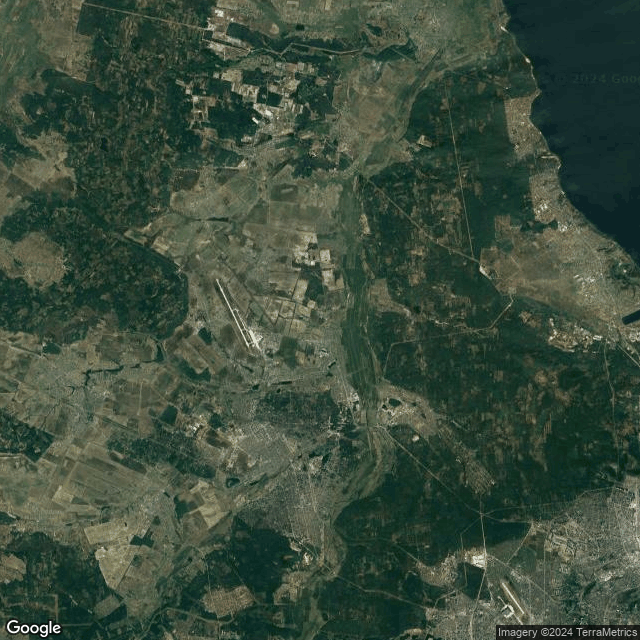

In [ ]:
retriever10.reg_image

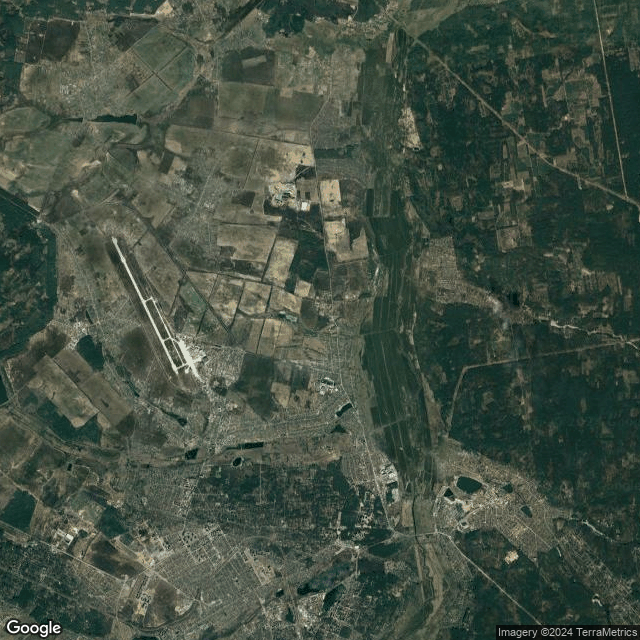

In [ ]:
retriever15.reg_image

In [ ]:
retriever10.show_region_coordinates()

Region coordinates: lat_min=50.555378719704066, lon_min=30.180589491227035, lat_max=50.64531088029594, lon_max=30.322276108772964


In [ ]:
retriever15.show_region_coordinates()

Region coordinates: lat_min=50.555378719704066, lon_min=30.180589491227035, lat_max=50.64531088029594, lon_max=30.322276108772964


In [ ]:
retriever10.region_zoom

11

In [ ]:
retriever15.region_zoom

12